<a href="https://colab.research.google.com/github/Dileep1610/Capstone-Project-1-Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Importing Essential Libraries

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%lsmagic
import matplotlib.pyplot as plt
%matplotlib inline

# Mounting drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## csv file location and reading csv file

In [108]:
hotel_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project/Exploratory Data Analysis/Hotel Booking Analysis/Hotel Bookings.csv')

#Data Exploration

In [109]:
#checking the shape ( rows and column numbers)
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [110]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [111]:
hotel_df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [6]:
hotel_df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [ ]:
hotel_df['reserved_room_type'].unique()

# **Data Cleaning**
### Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

### Data cleaning is done in the following steps:-  
1) Remove duplicate rows  
2) Handling missing values.  
3) Convert columns to appropriate datatypes.  
4) Adding important columns

## Step-1: Remove duplicate rows

In [112]:
# No. of duplicate rows
hotel_df[hotel_df.duplicated()].shape

(31994, 32)

So we have 31994 duplicate rows in our data and we will drop the duplicate rows from our data.

In [113]:
# Dropping duplicate values
hotel_df.drop_duplicates(inplace = True)

In [61]:
hotel_df.shape

(87396, 32)

## Step-2: Handling missing values

In [114]:
# Columns having missing values
hotel_df.isna().sum().sort_values(ascending= False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


### Here, only 4 columns are null and the reason being customer didnt' book hotel via any agent or via any company.
### We will replace null values by 0 in these columns

In [115]:
hotel_df[['company','agent','children']]= hotel_df[['company','agent','children']].replace(np.nan,0)

In [116]:
hotel_df['country']= hotel_df['country'].replace(np.nan,'others')

In [117]:
hotel_df.isna().sum().sort_values(ascending= False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null_counts'})

,Columns,Null_counts
0,hotel,0
1,is_canceled,0
2,reservation_status,0
3,total_of_special_requests,0
4,required_car_parking_spaces,0
5,adr,0


### We have sucessfully handled the missing values.

## Step-3:  Convert columns to appropriate datatypes.

In [118]:
# Converting from float to int
hotel_df = hotel_df.astype({'children':'int64','agent':'int64','company':'int64'})
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                           

## Step-4.) Adding new columns

In [119]:
hotel_df['Total_stay']= hotel_df['stays_in_weekend_nights']+ hotel_df['stays_in_week_nights']
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


# **EDA (Exploratory Data Analysis)**

#	**Hotel wise Analysis**

## Q1.) What is the percentage booking each hotel?

In [120]:
booking_df =hotel_df['hotel'].value_counts()

Text(0.5, 1.0, 'Percentage booking in each hotel')

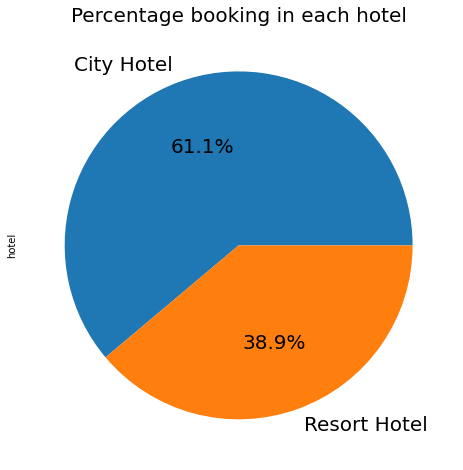

In [121]:
ax = booking_df.plot.pie(figsize=(10,8),fontsize=20, autopct='%1.1f%%')

ax.set_title('Percentage booking in each hotel',fontsize=20)

### Around 60% booking is for City Hotel and 40% is for Resort hotel.

## Q2.) Which hotel has higher booking cancellation rate? 

In [104]:
# booking canceled=1 
# booking not canceled= 0

# creating new DataFrame where bookings are cancelled.
canceled_df=hotel_df[hotel_df['is_canceled']==1]

# Grouping by hotel
canceled_df=canceled_df.groupby('hotel').size().reset_index().rename(columns={0: "no_of_cancelled_bookings"})

# adding 'total booking column for calculating the percentage.
canceled_df['total_booikngs']=hotel_df.groupby('hotel').size().reset_index().rename(columns={0:"total_bookings"}).drop('hotel',axis=1)
canceled_df

# Calculating cancel percentage
canceled_df['cancel %']= round(canceled_df['no_of_cancelled_bookings']/canceled_df['total_booikngs']*100,2)
canceled_df


,hotel,no_of_cancelled_bookings,total_booikngs,cancel %
0,City Hotel,16049,53428,30.04
1,Resort Hotel,7976,33968,23.48


Text(0.5, 1.0, 'Percentage of booking cancellation')

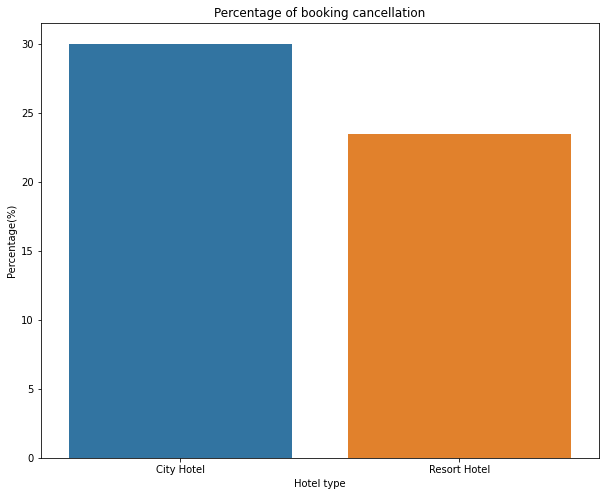

In [105]:
plt.figure(figsize=(10,8))
sns.barplot(x=canceled_df['hotel'],y=canceled_df['cancel %'])

# Set labels
plt.xlabel('Hotel type')
plt.ylabel('Percentage(%)')
plt.title("Percentage of booking cancellation")

### Thua, City Hotel has highest booking cancellation.

## Q3.) What is most preferred stay length in each hotel? 

In [125]:
not_canceled_df = hotel_df[hotel_df['is_canceled']==0]

not_canceled_df= not_canceled_df.groupby('hotel')['Total_stay'].value_counts()
not_canceled_df

hotel         Total_stay
City Hotel    3             9306
              1             7986
              2             7639
              4             6533
              5             2914
                            ... 
Resort Hotel  45               1
              46               1
              56               1
              60               1
              69               1
Name: Total_stay, Length: 68, dtype: int64